In [3]:
import numpy as np 
import matplotlib.pyplot as plt
import random 
from datetime import datetime 

In [2]:
def Model2_Simulation(q1, q2, lambda_1, lambda_2, lambda_3, lambda_4, gamma_11, gamma_12, gamma_21, gamma_22, TERM):
    r1 = 1-q1
    r2 = 1-q2
    TNOW = 0  
    Q1 = 0
    Q2 = 0
    Q3 = 0 
    Q4 = 0
    AQ1 = 0 
    AQ2 = 0 
    AQ3=0
    AQ4 = 0 
    
    # Initialise number of iterations to be 0 
    iteration = 0 
    #Initialise number of arrivals, matches and abandonments to be 0 
    Matches_CE = 0
    Matches_EE = 0 
    Matches_JC = 0
    Matches_JE = 0
    
    # (can add in arrivals of C1 and C2 separately if needed)
    Arrivals_CE = 0
    Arrivals_EE = 0 
    Arrivals_JC = 0
    Arrivals_JE = 0
    
    Abandonment_CE = 0
    Abandonment_EE = 0
    Abandonment_JC = 0
    Abandonment_JE = 0
    
     
    # Initalise vector to store the time 
    Time_v = []
    
    # Initialize event calander to be a 4d vector 
    EC= ([0]*5)
    EC[0] = -(np.log(1-np.random.uniform(0, 1))/lambda_1)
    EC[1] = -(np.log(1-np.random.uniform(0, 1))/lambda_2)
    EC[2] = -(np.log(1-np.random.uniform(0, 1))/lambda_3)
    EC[3] = -(np.log(1-np.random.uniform(0, 1))/lambda_4)
    EC[4] = TERM
    EC = np.array(EC)
    
    while TNOW < TERM:
        
        iteration += 1
        
        # Time of next event is minimum entry in event calender
        TNEXT = EC.min()
        
        # Type of next event (index of minimum entry in event calender)
        ENEXT = EC.argmin()
        
        # Update area statistics
        AQ1 += ((TNEXT-TNOW)*Q1)
        AQ2 += ((TNEXT-TNOW)*Q2)
        AQ3 += ((TNEXT-TNOW)*Q3)
        AQ4 += ((TNEXT-TNOW)*Q4)
        
        # Update time vector 
        TNOW = TNEXT
        Time_v = np.append(Time_v, TNOW)
        
        # Next event is arrival of a class 1 CE (Q1)
        if(ENEXT==0):
            
            # Increase CE arrivals by 1
            Arrivals_CE += 1 
            
            # Initialise m=0 to be the matchings found for this CE 
            m=0
            
            # If there are class 2 CEs to match with first check these
            if(Q3 > 0):
                
                # Loop through each C2 CE and check for matching 
                for i in range(Q3):
                    
                    # Generate uniform RV for checking 
                    u = np.random.uniform(0,1)
                    
                    # if u < probability of matching 
                    if(u < (1-r1)):
                        
                        # CE matches with CE and they both leave system 
                        m += 1 
                        Q3 -= 1 
                        
                        # Increase CE matches by 2
                        Matches_CE += 1
                        Matches_JC += 1
                        
                        # Update event calender to remove abandonment time of the Q3 (C2 CE)
                        EC = np.delete(EC, (5+Q1+Q2+i))
                
                        break
                    
            # If no matches yet and there are C2 EEs to match with         
            if(Q4 > 0 and m==0):
                
                # Loop through each C2 EE and check for matching 
                for i in range(Q4):
                    
                    # Generate uniform RV for checking 
                    u = np.random.uniform(0,1)
                    
                    # if u < probability of matching 
                    if(u < (1-r2)):
                        
                        # CE matches with EE and they both leave system 
                        m += 1 
                        Q4 -= 1 
                        
                        # Increase CE and EE matches by 1
                        Matches_CE += 1
                        Matches_JE += 1 
                        
                        # Update event calender to remove abandonment time of the Q4 (C2 EE)
                        EC = np.delete(EC, (5+Q1+Q2+Q3+i))
                
                        break
                    
            # If there are no matches found or possible    
            if(m == 0):
                
                # Update EC to inlclude abandonment time of the arrived C1 CE (Q1)
                EC=np.insert(EC, (5+Q1), (TNOW-(np.log(1-np.random.uniform(0, 1))/gamma_11)))
                
                # Joins queue 
                Q1 += 1
                
        # Update EC to include next arrival time of CE
            EC[0]=TNOW -(np.log(1-np.random.uniform(0, 1))/lambda_1)
        
        # Next event is arrival of a class 1 EE (Q2)
        elif(ENEXT==1):
            
            # Increase EE arrivals by 1
            Arrivals_EE += 1 
            
            # Initialise m=0 to be the matchings found for this EE 
            m=0
            
            # If there are JEs to match with first check these
            if(Q4 > 0):
                
                # Loop through each JE and check for matching 
                for i in range(Q4):
                    
                    # Generate uniform RV for checking 
                    u = np.random.uniform(0,1)
                    
                    # if u < probability of matching 
                    if(u < (1-r1)):
                        
                        # EE matches with EE and they both leave system 
                        m += 1 
                        Q4 -= 1 
                        
                        # Increase EE and JE matches by 1
                        Matches_EE += 1
                        Matches_JE += 1 
                        
                        # Update event calender to remove abandonment time of the Q4 (C2 EE)
                        EC = np.delete(EC, (5+Q1+Q2+Q3+i))
                
                        break
                    
            # If no matches yet and there are JC to match with         
            if(Q3 > 0 and m==0):
                
                # Loop through each JC and check for matching 
                for i in range(Q3):
                    
                    # Generate uniform RV for checking 
                    u = np.random.uniform(0,1)
                    
                    # if u < probability of matching 
                    if(u < (1-r2)):
                        
                        # EE matches with JC and they both leave system 
                        m += 1 
                        Q3 -= 1 
                        
                        # Increase EE and JC matches by 
                        Matches_EE += 1
                        Matches_JC += 1
                        
                        # Update event calender to remove abandonment time of the Q3 (JC)
                        EC = np.delete(EC, (5+Q1+Q2+i))
                
                        break
                    
            # If there are no matches found or possible    
            if(m == 0):
                
                # Update EC to inlclude abandonment time of the arrived C1 CE (Q1)
                EC=np.insert(EC, (5+Q1+Q2), (TNOW-(np.log(1-np.random.uniform(0, 1))/gamma_12)))
                
                # Joins queue 
                Q2 += 1
                
        # Update EC to include next arrival time of EE
            EC[1]=TNOW -(np.log(1-np.random.uniform(0, 1))/lambda_2)
        
        # Next event is arrival of a class 2 CE (Q3)
        elif(ENEXT==2):
            
            # Increase JC arrivals by 1
            Arrivals_JC += 1 
            
            # Initialise m=0 to be the matchings found for this CE 
            m=0
            
            # If there are class 1 CEs to match with first check these
            if(Q1 > 0):
                
                # Loop through each C1 CE and check for matching 
                for i in range(Q1):
                    
                    # Generate uniform RV for checking 
                    u = np.random.uniform(0,1)
                    
                    # if u < probability of matching 
                    if(u < (1-r1)):
                        
                        # CE matches with CE and they both leave system 
                        m += 1 
                        Q1 -= 1 
                        
                        # Increase CE matches by 2
                        Matches_CE += 1
                        Matches_JC += 1 
                        
                        # Update event calender to remove abandonment time of the Q1 (C1 CE)
                        EC = np.delete(EC, (5+i))
                
                        break
                    
            # If no matches yet and there are C1 EEs to match with         
            if(Q2 > 0 and m==0):
                
                # Loop through each C1 EE and check for matching 
                for i in range(Q2):
                    
                    # Generate uniform RV for checking 
                    u = np.random.uniform(0,1)
                    
                    # if u < probability of matching 
                    if(u < (1-r2)):
                        
                        # CE matches with EE and they both leave system 
                        m += 1 
                        Q2 -= 1 
                        
                        # Increase CE and EE matches by 1
                        Matches_EE += 1
                        Matches_JC += 1 
                        
                        # Update event calender to remove abandonment time of the Q2 (C1 EE)
                        EC = np.delete(EC, (5+Q1+i))
                
                        break
                    
            # If there are no matches found or possible    
            if(m == 0):
                
                # Update EC to inlclude abandonment time of the arrived C2 CE (Q3)
                EC=np.insert(EC, (5+Q1+Q2+Q3), (TNOW-(np.log(1-np.random.uniform(0, 1))/gamma_21)))
                
                # Joins queue 
                Q3 += 1
                
        # Update EC to include next arrival time of CE
            EC[2]=TNOW -(np.log(1-np.random.uniform(0, 1))/lambda_3)
        
        
        # Next event is arrival of a class 2 EE (Q4)
        elif(ENEXT==3):
            
            # Increase EE arrivals by 1
            Arrivals_JE += 1 
            
            # Initialise m=0 to be the matchings found for this EE 
            m=0
            
            # If there are JEs to match with first check these
            if(Q2 > 0):
                
                # Loop through each C1 CE and check for matching 
                for i in range(Q2):
                    
                    # Generate uniform RV for checking 
                    u = np.random.uniform(0,1)
                    
                    # if u < probability of matching 
                    if(u < (1-r1)):
                        
                        # JE matches with EE and they both leave system 
                        m += 1 
                        Q2 -= 1 
                        
                        # Increase EE and JE matches by 1
                        Matches_JE += 1
                        Matches_EE += 1 
                        
                        # Update event calender to remove abandonment time of the Q2 (C1 CE)
                        EC = np.delete(EC, (5+Q1+i))
                
                        break
                    
            # If no matches yet and there are CEs to match with         
            if(Q1 > 0 and m==0):
                
                # Loop through each C1 EE and check for matching 
                for i in range(Q1):
                    
                    # Generate uniform RV for checking 
                    u = np.random.uniform(0,1)
                    
                    # if u < probability of matching 
                    if(u < (1-r2)):
                        
                        # EE matches with EE and they both leave system 
                        m += 1 
                        Q1 -= 1 
                        
                        # Increase JE and CE matches by 1
                        Matches_CE += 1
                        Matches_JE += 1
                        
                        # Update event calender to remove abandonment time of the Q2 (C1 EE)
                        EC = np.delete(EC, (5+i))
                
                        break
                    
            # If there are no matches found or possible    
            if(m == 0):
                
                # Update EC to inlclude abandonment time of the arrived Q4 (JE)
                EC=np.insert(EC, (5+Q1+Q2+Q3+Q4), (TNOW-(np.log(1-np.random.uniform(0, 1))/gamma_22)))
                
                # Joins queue 
                Q4 += 1
                
            # Update EC to include next arrival time of EE
            EC[3]=TNOW -(np.log(1-np.random.uniform(0, 1))/lambda_4)
            
            
        # Next event is abandonment of C1 CE Q1:
        elif((ENEXT>4) and (ENEXT <= (4+Q1))):
            
            # Q1 decreases by 1 
            Q1 -= 1 
            
            # Abandonment increases by 1
            Abandonment_CE += 1
            # Remove abandonment time frmo event calendar 
            EC = np.delete(EC, ENEXT)
        
        # Next event is abandonment of C1 EE (Q2)
        elif((ENEXT>4+Q1) and (ENEXT <= (4+Q1+Q2))):
            
            # Q2 decreases by 1 
            Q2 -= 1 
            
            # Abandonment increases by 1
            Abandonment_EE += 1
            # Remove abandonment time frmo event calendar 
            EC = np.delete(EC, ENEXT)
        
        # Next event is abandonment of JC (Q3)
        elif((ENEXT>4+Q1+Q2) and (ENEXT <= (4+Q1+Q2+Q3))):
            
            # Q3 decreases by 1 
            Q3 -= 1 
            
            # Abandonment increases by 1
            Abandonment_JC += 1
            
            # Remove abandonment time frmo event calendar 
            EC = np.delete(EC, ENEXT)
        
        # Next abandonment of JE (Q4)
        elif((ENEXT>4+Q1+Q2+Q3) and (ENEXT <= (4+Q1+Q2+Q3+Q4))):
            
            # Q4 decreases by 1 
            Q4 -= 1 
            
            # Abandonment increases by 1
            Abandonment_JE += 1
            
            # Remove abandonment time frmo event calendar 
            EC = np.delete(EC, ENEXT)
            
            
        
       
            
    T_Q = AQ1 + AQ2 + AQ3 + AQ4
    
    if(Arrivals_CE > 0):
        CEMatchRate = Matches_CE/Arrivals_CE
        CEAbandonRate = Abandonment_CE/Arrivals_CE
    else:
        CEMatchRate = 0
        CEAbandonRate = 0
        
    if(Arrivals_EE>0):
        EEMatchRate = Matches_EE/Arrivals_EE
        EEAbandonRate = Abandonment_EE/Arrivals_EE
    else:
        EEMatchRate = 0 
        EEAbandonRate = 0
    if(Arrivals_JC > 0):
        JCMatchRate = Matches_JC/Arrivals_JC
        JCAbandonRate = Abandonment_JC/Arrivals_JC
    else:
        JCMatchRate = 0
        JCAbandonRate = 0
    if(Arrivals_JE > 0):
        JEMatchRate = Matches_JE/Arrivals_JE
        JEAbandonRate = Abandonment_JE/Arrivals_JE
    else:
        JEMatchRate = 0
        JEAbandonRate = 0
    if(Arrivals_CE +Arrivals_EE+Arrivals_JC + Arrivals_JE > 0):
        TotalMatchRate = ((Matches_CE+Matches_EE+Matches_JE + Matches_JC)/(Arrivals_CE+Arrivals_EE+Arrivals_JC + Arrivals_JE))
        TotalAbandonRate = ((Abandonment_CE+Abandonment_EE+Abandonment_JC + Abandonment_JE)/(Arrivals_CE+Arrivals_EE+Arrivals_JC + Arrivals_JE))
    else:
        TotalMatchRate = 0
        TotalAbandonRate = 0
        
    Av_AQ1= AQ1/TERM
    Av_AQ2= AQ2/TERM
    Av_AQ3= AQ3/TERM
    Av_AQ4 = AQ4/TERM
    Av_Q_Total= T_Q/TERM
        
    return Av_AQ1, Av_AQ2, Av_AQ3, Av_AQ4, Av_Q_Total, CEMatchRate, EEMatchRate, JCMatchRate, JEMatchRate, TotalMatchRate, CEAbandonRate, EEAbandonRate, JCAbandonRate, JEAbandonRate, TotalAbandonRate


            
            
        
        
        
        
        
        
        
                


        
        
                
        
                


                
        
                


In [3]:
print(datetime. now())
gamma12 = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

CE_Match_rates = []
EE_Match_rates = []
JC_Match_rates = []
JE_Match_rates = []
Total_Match_rates = []
CE_Abandon_rates = []
EE_Abandon_rates = []
JC_Abandon_rates = []
JE_Abandon_rates = []
JE_Match_rates = []
Total_Abandon_rates = []
CE_Queue_length = []
EE_Queue_length = []
JC_Queue_length = []
JE_Queue_length =[]
Total_Queue_length = []



for i in range(len(gamma12)):
    print(gamma12[i])
    print(i)
    CE_Rep_m_rate = []
    EE_Rep_m_rate = []
    JC_Rep_m_rate = []
    JE_Rep_m_rate = []
    Total_Rep_m_rate = []
    CE_Rep_a_rate = []
    EE_Rep_a_rate = []
    JC_Rep_a_rate = []
    JE_Rep_a_rate = []
    Total_Rep_a_rate = []
    CE_Rep_q_length = []
    EE_Rep_q_length = []
    JC_Rep_q_length = []
    JE_Rep_q_length = []
    Total_Rep_q_length = []
    
    for j in range(5):
        print(j)
        print(datetime. now())
        rep_results=Job_2type(0.75, 0.5, 1, 1, 1, 1, 0.1, gamma12[i], 0.05, 0.05, 30000)
        CE_Rep_m_rate = np.append(CE_Rep_m_rate, rep_results[5])
        EE_Rep_m_rate = np.append(EE_Rep_m_rate, rep_results[6])
        JC_Rep_m_rate = np.append(JC_Rep_m_rate, rep_results[7])
        JE_Rep_m_rate = np.append(JE_Rep_m_rate, rep_results[8])
        Total_Rep_m_rate = np.append(Total_Rep_m_rate, rep_results[9])
        CE_Rep_a_rate = np.append(CE_Rep_a_rate, rep_results[10])
        EE_Rep_a_rate = np.append(EE_Rep_a_rate, rep_results[11])
        JC_Rep_a_rate = np.append(JC_Rep_a_rate, rep_results[12])
        JE_Rep_a_rate = np.append(JE_Rep_a_rate, rep_results[13])
        Total_Rep_a_rate = np.append(Total_Rep_a_rate, rep_results[14])
        CE_Rep_q_length = np.append(CE_Rep_q_length, rep_results[0])
        EE_Rep_q_length = np.append(EE_Rep_q_length, rep_results[1])
        JC_Rep_q_length = np.append(JC_Rep_q_length, rep_results[2])
        JE_Rep_q_length = np.append(JE_Rep_q_length, rep_results[3])
        Total_Rep_q_length = np.append(Total_Rep_q_length, rep_results[4])
    CE_Match_rates = np.append(CE_Match_rates, np.average(CE_Rep_m_rate))
    EE_Match_rates = np.append(EE_Match_rates, np.average(EE_Rep_m_rate))
    JC_Match_rates = np.append(JC_Match_rates, np.average(JC_Rep_m_rate))
    JE_Match_rates = np.append(JE_Match_rates, np.average(JE_Rep_m_rate))
    Total_Match_rates = np.append(Total_Match_rates, np.average(Total_Rep_m_rate))
    CE_Abandon_rates = np.append(CE_Abandon_rates, np.average(CE_Rep_a_rate))
    EE_Abandon_rates = np.append(EE_Abandon_rates, np.average(EE_Rep_a_rate))
    JC_Abandon_rates = np.append(JC_Abandon_rates, np.average(JC_Rep_a_rate))
    JE_Abandon_rates = np.append(JE_Abandon_rates, np.average(JE_Rep_a_rate))
    Total_Abandon_rates = np.append(Total_Abandon_rates, np.average(Total_Rep_a_rate))
    CE_Queue_length = np.append(CE_Queue_length, np.average(CE_Rep_q_length))
    EE_Queue_length = np.append(EE_Queue_length, np.average(EE_Rep_q_length))
    JC_Queue_length = np.append(JC_Queue_length, np.average(JC_Rep_q_length))
    JE_Queue_length = np.append(JE_Queue_length, np.average(JE_Rep_q_length))
    Total_Queue_length = np.append(Total_Queue_length, np.average(Total_Rep_q_length))
    
    print(CE_Match_rates)
    print(EE_Match_rates)
    print(JC_Match_rates)
    print(JE_Match_rates)
    print(Total_Match_rates)
    print(CE_Abandon_rates)
    print(EE_Abandon_rates)
    print(JC_Abandon_rates)
    print(JE_Abandon_rates)
    print(Total_Abandon_rates)
    print(CE_Queue_length)
    print(EE_Queue_length)
    print(JC_Queue_length)
    print(JE_Queue_length)
    print(Total_Queue_length)

    
    
print(datetime. now())   

2023-08-16 09:02:38.192499
0
0
0
2023-08-16 09:02:38.193870


/Users/corinnephillips/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:200: RuntimeWarning: divide by zero encountered in double_scalars


1
2023-08-16 09:02:52.135426
2
2023-08-16 09:03:08.175200
3
2023-08-16 09:03:21.126455
4
2023-08-16 09:03:34.258577
[0.88641]
[0.99983182]
[0.93849397]
[0.93762107]
[0.94052931]
[0.1135833]
[0.]
[0.06150603]
[0.06237893]
[0.05942728]
[1.13486129]
[2.33574968]
[1.24067441]
[1.23379611]
[5.94508149]
0.1
1
0
2023-08-16 09:03:47.927568
1
2023-08-16 09:04:02.573457
2
2023-08-16 09:04:16.706295
3
2023-08-16 09:04:30.439784
4
2023-08-16 09:04:42.906583
[0.88641    0.92175077]
[0.99983182 0.9203635 ]
[0.93849397 0.92133905]
[0.93762107 0.9205254 ]
[0.94052931 0.92099164]
[0.1135833  0.07824254]
[0.         0.07956395]
[0.06150603 0.07860736]
[0.06237893 0.07944802]
[0.05942728 0.07896839]
[1.13486129 0.77339293]
[2.33574968 0.78725732]
[1.24067441 1.56899875]
[1.23379611 1.58553607]
[5.94508149 4.71518507]
0.2
2
0
2023-08-16 09:04:55.406983
1
2023-08-16 09:05:08.597555
2
2023-08-16 09:05:23.140647
3
2023-08-16 09:05:37.850086
4
2023-08-16 09:05:54.493195
[0.88641    0.92175077 0.9348084 ]
[0.9

1
2023-08-16 09:13:10.700517
2
2023-08-16 09:13:23.711727
3
2023-08-16 09:13:36.728239
4
2023-08-16 09:13:51.010588
[0.88641    0.92175077 0.9348084  0.94005947 0.94667636 0.9523675
 0.95323435 0.95734242 0.95864615 0.9608542 ]
[0.99983182 0.9203635  0.89505881 0.87532909 0.86622042 0.85799297
 0.84979322 0.84697017 0.84103863 0.8407134 ]
[0.93849397 0.92133905 0.91611523 0.91035363 0.90891557 0.90763224
 0.90665803 0.90268456 0.9000691  0.89693978]
[0.93762107 0.9205254  0.91526858 0.9101849  0.90763498 0.90463627
 0.90636216 0.90204575 0.89992246 0.89682661]
[0.94052931 0.92099164 0.91531018 0.90893021 0.90737698 0.90565794
 0.9039761  0.90216532 0.8999434  0.89879848]
[0.1135833  0.07824254 0.0651916  0.05988729 0.05332364 0.0476325
 0.046759   0.04261778 0.0413472  0.03913911]
[0.         0.07956395 0.10494119 0.12463779 0.13377958 0.14199377
 0.15018687 0.15302313 0.15895473 0.15927319]
[0.06150603 0.07860736 0.08374489 0.08959318 0.09093144 0.09232763
 0.09327499 0.09726835 0.099

In [4]:
print(CE_Match_rates)
print(EE_Match_rates)
print(JC_Match_rates)
print(JE_Match_rates)
print(Total_Match_rates)
print(CE_Abandon_rates)
print(EE_Abandon_rates)
print(JC_Abandon_rates)
print(JE_Abandon_rates)
print(Total_Abandon_rates)
print(CE_Queue_length)
print(EE_Queue_length)
print(JC_Queue_length)
print(JE_Queue_length)
print(Total_Queue_length)

[0.88641    0.92175077 0.9348084  0.94005947 0.94667636 0.9523675
 0.95323435 0.95734242 0.95864615 0.9608542  0.96214547]
[0.99983182 0.9203635  0.89505881 0.87532909 0.86622042 0.85799297
 0.84979322 0.84697017 0.84103863 0.8407134  0.833568  ]
[0.93849397 0.92133905 0.91611523 0.91035363 0.90891557 0.90763224
 0.90665803 0.90268456 0.9000691  0.89693978 0.90042561]
[0.93762107 0.9205254  0.91526858 0.9101849  0.90763498 0.90463627
 0.90636216 0.90204575 0.89992246 0.89682661 0.89749346]
[0.94052931 0.92099164 0.91531018 0.90893021 0.90737698 0.90565794
 0.9039761  0.90216532 0.8999434  0.89879848 0.89844578]
[0.1135833  0.07824254 0.0651916  0.05988729 0.05332364 0.0476325
 0.046759   0.04261778 0.0413472  0.03913911 0.03781459]
[0.         0.07956395 0.10494119 0.12463779 0.13377958 0.14199377
 0.15018687 0.15302313 0.15895473 0.15927319 0.16641192]
[0.06150603 0.07860736 0.08374489 0.08959318 0.09093144 0.09232763
 0.09327499 0.09726835 0.09990437 0.10298012 0.09950762]
[0.0623789

In [5]:
# Results 

gamma12 = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]


CE_Match_rates = [0.88641, 0.92175077, 0.9348084, 0.94005947, 0.94667636, 0.9523675, 0.95323435, 0.95734242, 0.95864615, 0.9608542, 0.96214547]
EE_Match_rates = [0.99983182, 0.9203635, 0.89505881, 0.87532909, 0.86622042, 0.85799297, 0.84979322, 0.84697017, 0.84103863, 0.8407134, 0.833568]
JC_Match_rates = [0.93849397, 0.92133905, 0.91611523, 0.91035363, 0.90891557, 0.90763224, 0.90665803, 0.90268456, 0.9000691, 0.89693978, 0.90042561]
JE_Match_rates = [0.93762107, 0.9205254, 0.91526858, 0.9101849, 0.90763498, 0.90463627, 0.90636216, 0.90204575, 0.89992246, 0.89682661, 0.89749346]
Total_Match_rates = [0.94052931, 0.92099164, 0.91531018, 0.90893021, 0.90737698, 0.90565794, 0.9039761, 0.90216532, 0.8999434, 0.89879848, 0.89844578]

CE_Abandon_rates = [0.1135833, 0.07824254, 0.0651916, 0.05988729, 0.05332364, 0.0476325, 0.046759, 0.04261778, 0.0413472, 0.03913911, 0.03781459]
EE_Abandon_rates = [0.0, 0.07956395, 0.10494119, 0.12463779, 0.13377958, 0.14199377, 0.15018687, 0.15302313, 0.15895473, 0.15927319, 0.16641192]
JC_Abandon_rates = [0.06150603, 0.07860736, 0.08374489, 0.08959318, 0.09093144, 0.09232763, 0.09327499, 0.09726835, 0.09990437, 0.10298012, 0.09950762]
JE_Abandon_rates = [0.06237893, 0.07944802, 0.08463098, 0.08978813, 0.09223138, 0.09529056, 0.09361774, 0.09793431, 0.10001732, 0.1031, 0.10249319]
Total_Abandon_rates = [0.05942728, 0.07896839, 0.08462978, 0.09102806, 0.09255143, 0.0943104, 0.09599557, 0.09780636, 0.10003162, 0.10115809, 0.10151924]

CE_Queue_length = [1.13486129, 0.77339293, 0.66379591, 0.59609347, 0.5304974, 0.48815104, 0.47734359, 0.4250624, 0.41408611, 0.37855361, 0.38338607]
EE_Queue_length = [2.33574968, 0.78725732, 0.52926892, 0.41857824, 0.33334139, 0.28721302, 0.25044231, 0.22197916, 0.19706714, 0.17492809, 0.1655818]
JC_Queue_length = [1.24067441, 1.56899875, 1.68948313, 1.78697385, 1.83916048, 1.88082933, 1.86019176, 1.95498349, 1.99202803, 2.05126302, 1.99121756]
JE_Queue_length = [1.23379611, 1.58553607, 1.65765452, 1.77429301, 1.82063369, 1.88863458, 1.86607917, 1.97110991, 1.97132472, 2.09317609, 1.99822482]
Total_Queue_length = [5.94508149, 4.71518507, 4.54020247, 4.57593857, 4.52363296, 4.54482797, 4.45405683, 4.57313496, 4.574506, 4.69792082, 4.53841025]


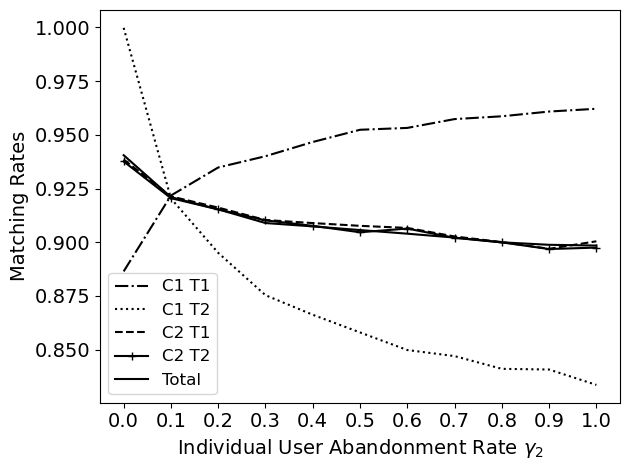

In [6]:
plt.xlabel(r'Individual User Abandonment Rate $\gamma_2$', fontsize=14)
plt.ylabel('Matching Rates', fontsize=14)
plt.plot(gamma12, CE_Match_rates, linestyle='dashdot', label = 'C1 T1', color='black')
plt.plot(gamma12, EE_Match_rates, linestyle='dotted', label = 'C1 T2', color='black')
plt.plot(gamma12, JC_Match_rates,  linestyle='dashed', label = 'C2 T1', color='black')
plt.plot(gamma12, JE_Match_rates,  linestyle='solid', marker='+' , label = 'C2 T2', color='black')
plt.plot(gamma12, Total_Match_rates, linestyle='solid', label = 'Total', color='black')
plt.xticks(gamma12, fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=12)
plt.tight_layout()
plt.savefig('Exp16_Match.png')
plt.show()

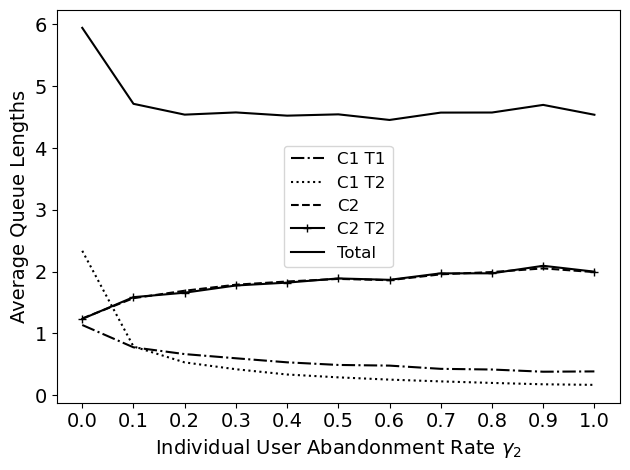

In [7]:
plt.xlabel(r'Individual User Abandonment Rate $\gamma_2$', fontsize=14)
plt.ylabel('Average Queue Lengths', fontsize=14)
plt.plot(gamma12, CE_Queue_length, linestyle='dashdot', label = 'C1 T1', color='black')
plt.plot(gamma12, EE_Queue_length, linestyle='dotted', label = 'C1 T2', color='black')
plt.plot(gamma12, JC_Queue_length,  linestyle='dashed', label = 'C2', color='black')
plt.plot(gamma12, JE_Queue_length,  linestyle='solid', marker='+' , label = 'C2 T2', color='black')
plt.plot(gamma12, Total_Queue_length, linestyle='solid', label = 'Total', color='black')
plt.xticks(gamma12, fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=12)
plt.tight_layout()
plt.savefig('Exp16_Queue.png')
plt.show()



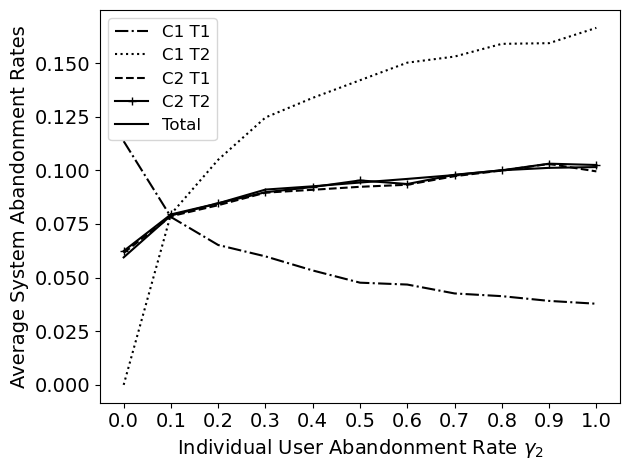

In [8]:
plt.xlabel(r'Individual User Abandonment Rate $\gamma_2$', fontsize=14)
plt.ylabel('Average System Abandonment Rates', fontsize=14)
plt.plot(gamma12, CE_Abandon_rates, linestyle='dashdot', label = 'C1 T1', color='black')
plt.plot(gamma12, EE_Abandon_rates, linestyle='dotted', label = 'C1 T2', color='black')
plt.plot(gamma12, JC_Abandon_rates, linestyle='dashed', label = 'C2 T1', color='black')
plt.plot(gamma12, JE_Abandon_rates,  linestyle='solid', marker='+' , label = 'C2 T2', color='black')
plt.plot(gamma12, Total_Abandon_rates, linestyle='solid', label = 'Total', color='black')
plt.xticks(gamma12, fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=12)
plt.tight_layout()
plt.savefig('Exp16_Abandon.png')
plt.show()



